In [10]:
import datetime
from json import loads
from pprint import pprint
import matplotlib.pyplot as plt

def date_range(date1, date2):
  start = datetime.datetime.strptime(date1, '%Y-%m-%d')
  end = datetime.datetime.strptime(date2, '%Y-%m-%d')
  step = datetime.timedelta(days=1)
  datelist= []
  while start <= end:
    datelist.append(start.date())
    start += step
  return datelist

def to_date(date):
  return datetime.datetime.strptime(date, '%Y-%m-%d').date()

In [4]:
balance = 3000

# Read transactions
with open('recurring.json') as f:
  recurring = loads(f.read())

# Prepare forecaster
dates = date_range('2018-08-26', '2018-12-31')
transactions = dict()

# Compute debits, credits, and balances per date
for date in dates:

  # Initialize date record
  transactions[date] = dict()

  # ------
  # Debits
  # ------

  debits = dict()

  # Parse monthly
  for k, v in recurring['monthly'].items():
    if v['day'] == date.day:
      debits[k] = v

  # Parse yearly
  for k, v in recurring['yearly'].items():
    if v['month'] == date.month and v['day'] == date.day:
      debits[k] = v

  # Parse one offs
  for due_name, due_dates in recurring['one_off_debits'].items():
    for due_date, due_amount in due_dates.items():
      if to_date(due_date) == date:
        debits[due_name] = dict(amount = due_amount)

  # Assign debits to date record
  transactions[date]['debits']= debits

  # Compute total debits, apply to balance
  due_amount_total = 0

  for k, v in transactions[date]['debits'].items():
    due_amount_total += v['amount']

  balance -= due_amount_total

  # -------
  # Credits
  # -------

  credits = dict()

  # Parse Facebook
  if date.day in recurring['facebook']['days']:
    # balance += recurring['facebook']['amount']
    credits['facebook'] = dict(amount = recurring['facebook']['amount'])

  # Parse one offs
  for owe_name, owe_dates in recurring['one_off_credits'].items():
    for owe_date, owe_amount in owe_dates.items():
      if to_date(owe_date) == date:
        credits[owe_name] = dict(amount = owe_amount)

  # Assign debits to date record
  transactions[date]['credits'] = credits

  # Compute total credits, apply to balance
  owe_amount_total = 0

  for k, v in transactions[date]['credits'].items():
    owe_amount_total += v['amount']

  balance += owe_amount_total

  # Assign summary stats to date record
  transactions[date]['due_amount_total'] = due_amount_total
  transactions[date]['owe_amount_total'] = owe_amount_total
  transactions[date]['balance'] = balance

# Print forecast
for k, v in sorted(transactions.items()):
  print(k, v['balance'], v['due_amount_total'], v['owe_amount_total'], v['debits'], v['credits'])

2018-08-26 2973 27 0 {'project_fi': {'day': 26, 'amount': 27}} {}
2018-08-27 2940 33 0 {'pge': {'day': 27, 'amount': 33}} {}
2018-08-28 2940 0 0 {} {}
2018-08-29 2940 0 0 {} {}
2018-08-30 2940 0 0 {} {}
2018-08-31 12940 0 10000 {} {'betty': {'amount': 10000}}
2018-09-01 19174 566 6800 {'safeco': {'month': 9, 'day': 1, 'amount': 566}} {'facebook': {'amount': 3000}, 'tenants_1': {'amount': 3800}}
2018-09-02 17174 2000 0 {'amex': {'amount': 2000}} {}
2018-09-03 17174 0 0 {} {}
2018-09-04 17174 0 0 {} {}
2018-09-05 17174 0 0 {} {}
2018-09-06 14474 2700 0 {'star_rooter': {'amount': 2700}} {}
2018-09-07 14434 40 0 {'youtube_tv': {'day': 7, 'amount': 40}} {}
2018-09-08 14434 0 0 {} {}
2018-09-09 13834 600 0 {'geico_2': {'month': 9, 'day': 9, 'amount': 600}} {}
2018-09-10 13834 0 0 {} {}
2018-09-11 13834 0 0 {} {}
2018-09-12 13834 0 0 {} {}
2018-09-13 13834 0 0 {} {}
2018-09-14 13834 0 0 {} {}
2018-09-15 13810 3024 3000 {'wells_fargo': {'day': 15, 'amount': 2137, 'on_amex': 0}, 'hoa': {'day': 

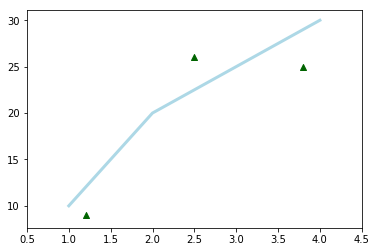

In [9]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()